<a href="https://colab.research.google.com/github/jay-kanakia/GenAI/blob/main/06_Pytorch_Project_ann_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [50]:
import pandas as pd

file_id = "1ziN7gJHnr-MQb0_eFsPfPfiiDuvsmqVH"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)
df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0


In [51]:
df.shape

(6000, 785)

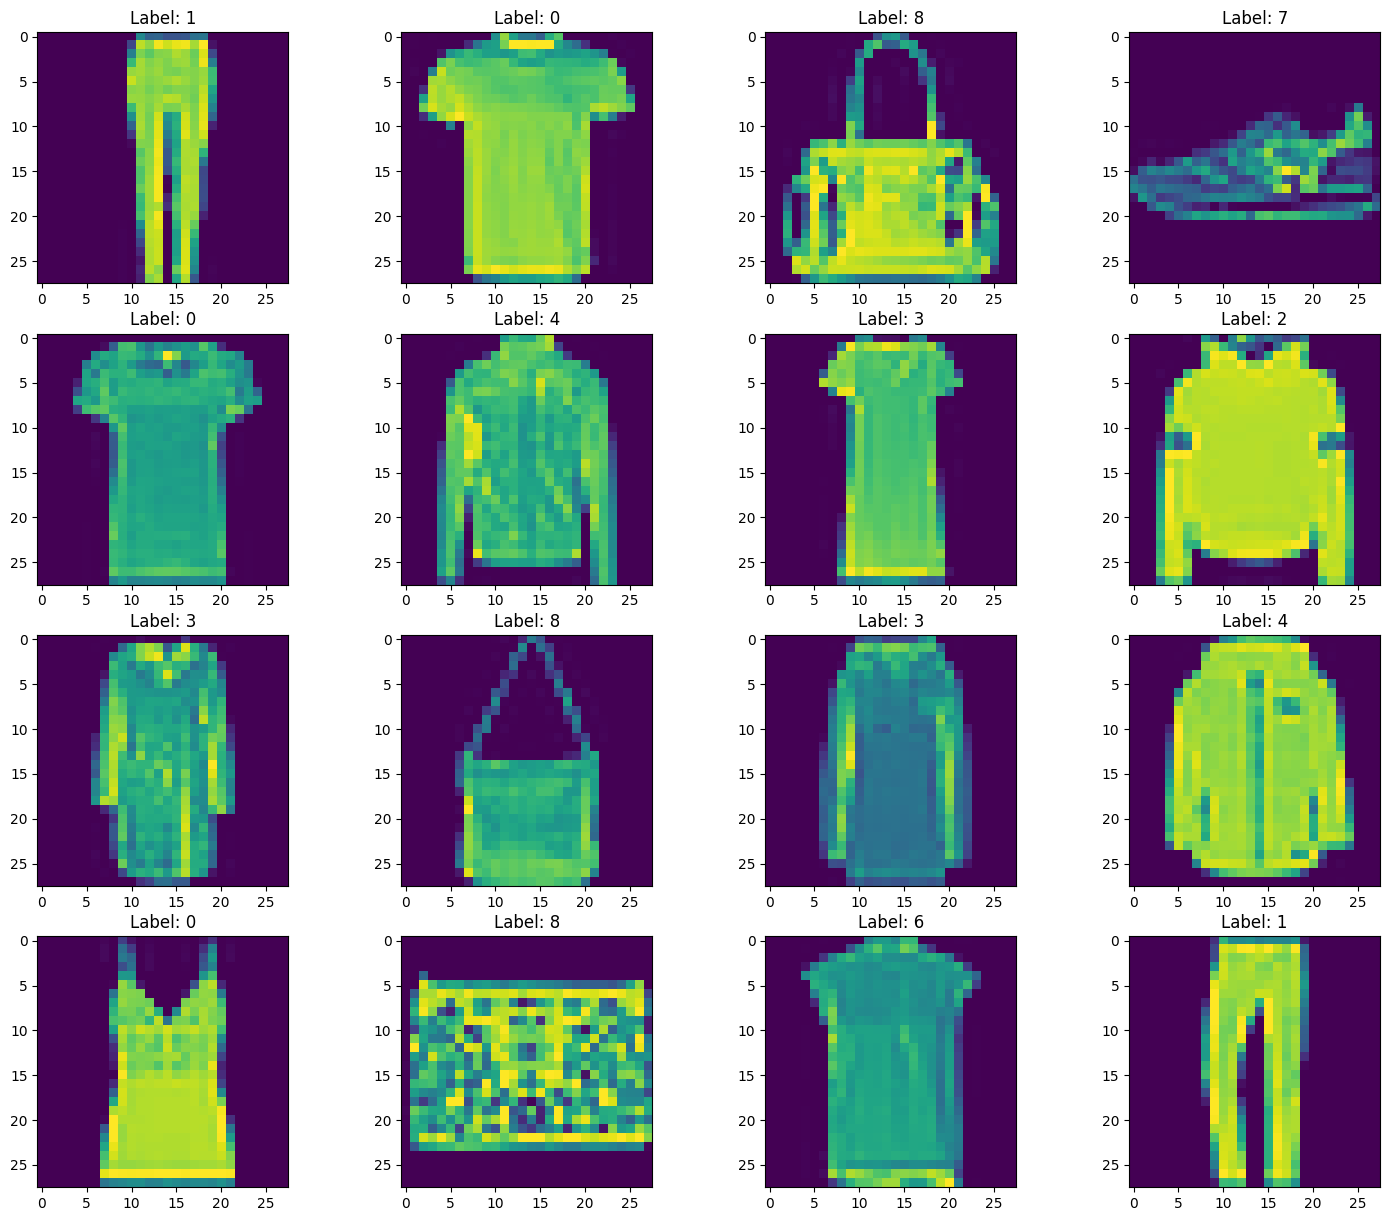

In [52]:
plt.figure(figsize=(18,15))
for i in range(1,17):
  plt.subplot(4,4,i)
  idx=np.random.randint(df.shape[0])
  img=df.iloc[idx,1:].values.reshape(28,28)
  plt.title(f"Label: {df.iloc[idx,0]}")
  plt.imshow(img)
plt.show()

In [53]:
np.random.randint(df.shape[0])

2598

In [54]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train_scaled=X_train/255
X_test_scaled=X_test/255

X_train_tensor=torch.from_numpy(X_train_scaled.astype(np.float32))
X_test_tensor=torch.from_numpy(X_test_scaled.astype(np.float32))
y_train_tensor=torch.from_numpy(y_train.astype(np.float32))
y_test_tensor=torch.from_numpy(y_test.astype(np.float32))

In [99]:
class MyDataset(Dataset):

  def __init__(self,features,labels):
    self.features=features
    self.labels=labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [100]:
train_dataset=MyDataset(X_train_tensor,y_train_tensor)
test_dataset=MyDataset(X_test_tensor,y_test_tensor)

In [101]:
train_loader=DataLoader(train_dataset,batch_size=128,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=128,shuffle=True)

In [102]:
import torch.nn as nn
class MyNN(nn.Module):

  def __init__(self,features):

    super().__init__()
    self.features=features

    self.model=nn.Sequential(
      nn.Linear(features,128),
      nn.ReLU(),
      nn.Linear(128,64),
      nn.ReLU(),
      nn.Linear(64,10)
    )

  def forward(self,X):
    return self.model(X)

In [103]:
X_train_tensor.shape[0]/256

18.75

In [104]:
epochs=250
learning_rate=0.0001
model=MyNN(X_train_tensor.shape[1])
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [107]:
for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    #forward
    y_pred=model(batch_features)

    #loss calculation
    loss=loss_function(y_pred,batch_labels.long())

    #gradients_zero
    optimizer.zero_grad()

    #backpropogation
    loss.backward()

    #update weights
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 2.206044441775272
Epoch: 2 , Loss: 1.9678605889019214
Epoch: 3 , Loss: 1.6557003824334395
Epoch: 4 , Loss: 1.3596845582911843
Epoch: 5 , Loss: 1.1536087456502413
Epoch: 6 , Loss: 1.0222269500556744
Epoch: 7 , Loss: 0.9392785116245872
Epoch: 8 , Loss: 0.8821652264971482
Epoch: 9 , Loss: 0.8366614674267016
Epoch: 10 , Loss: 0.7999510153343803
Epoch: 11 , Loss: 0.7710896353972586
Epoch: 12 , Loss: 0.7443098221954546
Epoch: 13 , Loss: 0.7223519337804694
Epoch: 14 , Loss: 0.7021804326458981
Epoch: 15 , Loss: 0.683449753020939
Epoch: 16 , Loss: 0.6690555638388583
Epoch: 17 , Loss: 0.6520150209728041
Epoch: 18 , Loss: 0.6360444473592859
Epoch: 19 , Loss: 0.6195294386462161
Epoch: 20 , Loss: 0.6085981585477528
Epoch: 21 , Loss: 0.599046129929392
Epoch: 22 , Loss: 0.5852970739728526
Epoch: 23 , Loss: 0.5749741729937101
Epoch: 24 , Loss: 0.5651891529560089
Epoch: 25 , Loss: 0.553430429414699
Epoch: 26 , Loss: 0.5484965224015085
Epoch: 27 , Loss: 0.5389067907082407
Epoch: 28 , Lo

In [108]:
# Evaluation

In [109]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [123]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    y_pred=model(batch_features)
    predicted_labels=torch.argmax(y_pred,dim=1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted_labels == batch_labels).sum().item()

print(correct/total)

0.9616666666666667


In [91]:
batch_labels.shape

torch.Size([128])

In [119]:
batch_labels.shape

torch.Size([48])

In [120]:
X_test_tensor.shape

torch.Size([1200, 784])